<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

# Intro to Data Cleaning

***

Week 2 | Lesson 2.3 <br>
John Marin <br>
Santa Monica

## Class Codealong: <br><br>

### github week-02: w2-2.3-demo.ipynb

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Inspect data types
- Clean up a column using **df.apply()**
- Know what situations to use **.value_counts()** in your code

### LESSON GUIDE
| TIMING  | TYPE  | TOPIC  |
|:-:|---|---|
| 5 min  | [Introduction](#introduction)   | Inpsect data types, df.apply(), .value_counts()  |
| 20 min  | [Demo /Guided Practice](#demo)  | Inpsect data types |
| 20 min  | [Demo /Guided Practice](#demo)  | df.apply() |
| 20 min  | [Demo /Guided Practice](#demo)  | .value_counts() |
| 20 min  | [Independent Practice](#ind-practice)  |   |
| 5 min  | [Conclusion](#conclusion)  |   |

<a name="introduction"></a>
## Introduction: Topic

The main data types stored in pandas objects are **float, int, bool, datetime64, timedelta, 
category, and object.** 

**df.apply()** will apply a function along any axis of the DataFrame. We'll see it in action below. 

**pandas.Series.value_counts** returns a Series with a method that returns counts of unique values. The resulting 
Series will be in descending order so that the first element is the most frequently-occurring 
element. Excludes NA values.

[Pandas: dtypes](http://pandas.pydata.org/pandas-docs/stable/pandas.pdf)

[Pandas Series: value_counts](http://nullege.com/codes/search/pandas.Series.value_counts)


<a name="Inpsect data types "></a>
## Demo /Guided Practice: Inspect data types 

Let's create a small dictionary with different data types in it. 

> [demo code](https://github.com/generalassembly-studio/dsi-course-materials/blob/W2-L2.3/curriculum/04-lessons/week-02/2.3-lesson/code/W2%20L2.3%20Intro%20to%20Data%20Cleaning%20demo%20code.ipynb)
can be found in the code folder and contains all the code in this lesson in a Jupyter
notebook. Follow along or create a new notebook.


### Import Pandas + Numpy

In [2]:
import pandas as pd
import numpy as np

### Create Test Data

In [33]:
test_data = dict( 
    A = np.random.rand(3),
    B = 1,
    C = 'foo',
    D = pd.Timestamp('20010102'),
    E = pd.Series([1.0]*3).astype('float32'),
    F = False,
    G = pd.Series([1]*3,dtype='int8')
)

In [34]:
test_data

{'A': array([ 0.41417927,  0.04995346,  0.53589641]),
 'B': 1,
 'C': 'foo',
 'D': Timestamp('2001-01-02 00:00:00'),
 'E': 0    1
 1    1
 2    1
 dtype: float32,
 'F': False,
 'G': 0    1
 1    1
 2    1
 dtype: int8}

### Create our DataFrame

In [66]:
dft = pd.DataFrame(test_data)
dft
dft['H'] = dft['E']*1
dft
dft.eval('I=H*100')
dft1 = dft.copy()
dft1.eval('J=I*1000')
dft1
dft
del dft1['I']

In [76]:
dft.dtypes

A           float64
B             int64
C            object
D    datetime64[ns]
E           float32
F              bool
G              int8
H           float32
I           float64
dtype: object

### Float64 v. Float32

### Float32 
Single-precision floating-point format is a computer number format that occupies 4 bytes (32 bits) in computer memory.  **This gives from 6 to 9 significant decimal digits precision.** <br>
### Float64
Double-precision floating-point format is a computer number format that occupies 8 bytes (64 bits). **This gives 15–17 significant decimal digits precision.**

**What might we expect dtypes in the case of mixed type values in a single dimension?**

ie:  [2, 3, 4, 5, 6, 7, 8.9]

If a pandas object contains data multiple dtypes IN A SINGLE COLUMN, the dtype of the column will be chosen to accommodate all of the data types (**object is the most general**).

### Ints are cast to floats

In [5]:
import pandas as pd
pd.Series([1, 2, 3, 4, 5, 6.])

0    1
1    2
2    3
3    4
4    5
5    6
dtype: float64

### String elements are cast to ``object`` dtype

In [8]:
pd.Series([1, 2, 3, 'foo'])

0      1
1      2
2      3
3    foo
dtype: object

In [13]:
# dft.get_dtype_counts().astype(list)
# PLEASE NOTE:  code below is more efficient

dft.get_dtype_counts()

bool              1
datetime64[ns]    1
float32           1
float64           1
int64             1
int8              1
object            1
dtype: int64


*Without* running this code with a Python interpreter, what types would you expect the common `dtype` to be selected?

    [1, 3, 9, .33, False, '03-20-1978', np.arange(22)]



You can do a lot more with dtypes.  Check out 
[Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/pandas.pdf).

## Why do you think it might be important to know what kind of dtypes you're working with? 

<a name=" df.apply()"></a>
## Guided Practice:  df.apply() 

Generally, df.apply(), will apply a singlular function to every cell of the dataframe you use it with.  

Conversely: df.map(), is available when you only want to work with a single dimension of your dataset, ie:  df['a'].map(my_func)

In [35]:
# Create some more test data
import numpy as np
np.random.seed(1)
df = pd.DataFrame(np.random.randn(10, 4), columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
3,-0.322417,-0.384054,1.133769,-1.099891
4,-0.172428,-0.877858,0.042214,0.582815
5,-1.100619,1.144724,0.901591,0.502494
6,0.900856,-0.683728,-0.122890,-0.935769
7,-0.267888,0.530355,-0.691661,-0.396754
8,-0.687173,-0.845206,-0.671246,-0.012665
9,-1.117310,0.234416,1.659802,0.742044


In [36]:
df[['a']]

,a
0,1.624345
1,0.865408
2,0.319039
3,-0.322417
4,-0.172428
5,-1.100619
6,0.900856
7,-0.267888
8,-0.687173
9,-1.117310


### Some Examples

In [37]:
# square root ALL CELLS (NaN == Not a Number)
df.apply(np.sqrt)

,a,b,c,d
0,1.274498,NaN,NaN,NaN
1,0.930273,NaN,1.320913,NaN
2,0.564835,NaN,1.209177,NaN
3,NaN,NaN,1.064786,NaN
4,NaN,NaN,0.205460,0.763423
5,NaN,1.069918,0.949521,0.708868
6,0.949134,NaN,NaN,NaN
7,NaN,0.728255,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,0.484165,1.288333,0.861420


_Note: Illustrate with whiteboard DataFrame, with blank axis labels._

### Apply method to only one axis, 0 (columns)


In [38]:
df.apply(np.mean, axis=0)

a    0.004181
b   -0.404402
c    0.493033
d   -0.451204
dtype: float64

### Apply method to only axis 1 (rows)

In [39]:
df.apply(np.mean, axis=1)

0   -0.147138
1   -0.113132
2   -0.132091
3   -0.168148
4   -0.106314
5    0.362047
6   -0.210383
7   -0.206487
8   -0.554072
9    0.379738
dtype: float64

### Further Reading

For more advanced `.apply` usage, check out these links:

["Why Not"'s Gist Examples](https://gist.github.com/why-not/4582705)

[Chris Albon's Map + Apply Examples](http://chrisalbon.com/python/pandas_apply_operations_to_dataframes.html)


### **Check:** How would find the std of the columns and rows? 

<a name=".value_counts()"></a>
## Guided Practice: .value_counts() 

Why is this important?  Basically, this tells us the count of unique values that exist.  It's helpful to identify anything unexpected.  Looking at value_counts(), per series, can give us a quick overview of values expressed in our data.

 - Strings inside of mostly numeric / continuous data
 - Non-numeric values
 - General counts of values that we might expect to see
 - Most common / least common values

Let's create some random data

In [40]:
data = np.random.randint(0, 7, size = 50)
data

array([0, 1, 1, 5, 3, 0, 0, 5, 5, 6, 4, 5, 6, 2, 4, 3, 5, 3, 5, 0, 3, 4, 3,
       4, 6, 4, 5, 4, 1, 0, 4, 2, 0, 5, 2, 4, 1, 1, 0, 2, 4, 4, 0, 4, 1, 6,
       4, 1, 0, 2])

In [78]:
s = pd.Series(data)
s.head()
pd.value_counts(s[::2])

0    6
4    5
5    4
1    4
3    3
6    2
2    1
dtype: int64

In [43]:
# The counts of each number that occurs in our array is listed
vc = pd.value_counts(s)
vc

4    12
0     9
5     8
1     7
3     5
2     5
6     4
dtype: int64

## Plot a Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f167dd0>]], dtype=object)

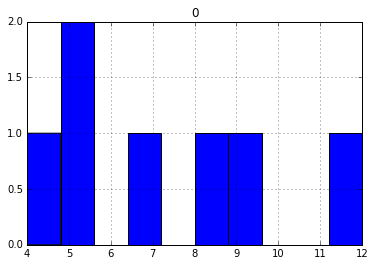

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
# PLEASE NOTE:  we must transform the values to a pandas dataframe
pd.DataFrame(vc).hist()

<a name="ind-practice"></a>
## Independent Practice: Topic (20  minutes)
- Use the sales.csv data set, we've seen this a few times in previous lessons
- Inspect the data types
- You've found out that all your values in column 1 are off by 1. Use df.apply to add 1 to column 1 of the dataset
- Use .value_counts to count the values of 1 column of the dataset

**Bonus** 
- Add 3 to column 2
- Use .value_counts for each column of the dataset



In [79]:
sales = pd.read_csv('sales_info.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1111cea90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110220990>]], dtype=object)

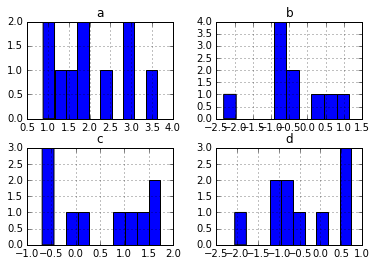

In [93]:
# sales
vol_counts = pd.value_counts(sales.volume_sold.map(round))
# vol_counts.hist()
df.hist()

In [86]:
# df.a.apply(lambda a: a +1)
map(lambda x:x+1, df['a'])
df.a = df.a +1
df.a


0    3.624345
1    2.865408
2    2.319039
3    1.677583
4    1.827572
5    0.899381
6    2.900856
7    1.732112
8    1.312827
9    0.882690
Name: a, dtype: float64

In [105]:
# BELOW IS AN ANOTHER EXAMPLE FOR 'eval()'

In [96]:
df['long_name'] = df['longer_name'] = df.c 

In [98]:
df['longest_name'] = df.eval('long_name + longer_name')

In [99]:
df

,a,b,c,d,long_name,longer_name,longest_name
0,3.624345,-0.611756,-0.528172,-1.072969,-0.528172,-0.528172,-1.056344
1,2.865408,-2.301539,1.744812,-0.761207,1.744812,1.744812,3.489624
2,2.319039,-0.249370,1.462108,-2.060141,1.462108,1.462108,2.924216
3,1.677583,-0.384054,1.133769,-1.099891,1.133769,1.133769,2.267539
4,1.827572,-0.877858,0.042214,0.582815,0.042214,0.042214,0.084427
5,0.899381,1.144724,0.901591,0.502494,0.901591,0.901591,1.803181
6,2.900856,-0.683728,-0.122890,-0.935769,-0.122890,-0.122890,-0.245780
7,1.732112,0.530355,-0.691661,-0.396754,-0.691661,-0.691661,-1.383322
8,1.312827,-0.845206,-0.671246,-0.012665,-0.671246,-0.671246,-1.342492
9,0.882690,0.234416,1.659802,0.742044,1.659802,1.659802,3.319604


<a name="conclusion"></a>
## Conclusion
Thus far, we've looked at summary stats and different
types of data types. We've selected and sliced data too. **Today we added inspecting data types, df.apply, .value_counts to
our pandas arsenal.** Nice!